# <p style = 'text-align: center;'> Predicting rice productivity through machine learning algorithms</p>
### <p style= 'text-align: center;'> <font color = blue> Prepared by </font> </p>
### <p style = 'text-align: center;'><font color= green> **Mustafa Kamal Shahadat, Dr. Md. Khairul Alam, Arindom Biswas, Dr. Mohammad Mukhlesur Rahman**</font></p>
## <p style='text-align: center;'> <font color = orange> Group 5 </font> </p>

## Introduction

<p style='text-align: justify;'> Machine learning algorithms have been using for a number of years in different domains of agriculture sector (McQueen et al., 1995). Crop yield and productivity prediction is one of the challenging problems in precision agriculture, and many models have been proposed and validated so far. This problem requires the use of several datasets since crop yield depends on many different factors such as climate, weather, soil, use of fertilizer, and seed variety (Xu et al., 2019). This indicates that crop yield prediction is not a trivial task; instead, it consists of several complicated steps. Nowadays, crop yield prediction models can estimate the actual yield reasonably, but a better performance in yield prediction is still desirable (Filippi et al., 2019a).
Machine learning is an important decision support tool for crop yield prediction, including supporting decisions on what crops to grow, what to do during the growing season of the crops and total productivity. Several machine learning algorithms have been applied to support crop yield prediction research. The most widely applied algorithms are artificial neural network, linear regression, random forest regressor, support vector machine, and gradient boosting. Since crop yield is a function of numerous factors, however, the most popular factors are crop variety, management, temperature, rainfall, solar radiation, soil type, fertility status etc. Most of the scientists used temperature, rainfall, humidity, solar radiation, area of production and soil type for predicting crop productivity using machine learning (Klompenburg. 2020). In the present work our research question is to prediction of rice productivity from average yield, land area and environmental parameters using different regression, tree based algorithm and artificial neural network. </p>

#### Objective
- To predict rice productivity using machine learning algorithms.

## Methods

•	Reasonable and justified choice of methods <br>
•	Well-described scripts
<p style='text-align: justify;'>In this study, machine learning approaches have been used to make prediction for rice productivity of four south-western coastal districts of Bangladesh, namely Khulna, Satkhira, Bagerhat and Narail. We collected historic rice production data (1995 to 2018) from Department of Agriculture Extension (DAE) and historical climatic data from Bangladesh Meteorological Department (BMD). Our target variable is rice production, which is a continuous variable. So, used different regression, tree based regressors and artifical neural network algorithms for predicting productivity. At the end these algorithms have been compared to achieve most accurate crop prediction  </p>

### Reading the data

#### Source of data file: https://github.com/kamal-bari/machine_learning_with_python/blob/main/crop_production_weather_data.csv

In [1]:
# Import pandas library for importing data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data with pandas dataframe from github repository
df = pd.read_csv("https://raw.githubusercontent.com/kamal-bari/machine_learning_with_python/main/crop_production_weather_data.csv")

# Displaying first five rows of the dataframe
display(df.head())

# Looking data dimension
df.shape

,Year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category
0,1995-96,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H
1,1996-97,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H
2,1997-98,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L
3,1998-99,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M
4,1999-00,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H


(264, 11)

In [3]:
# Spliting and display year column
df_Year = df['Year'].str.split("-", expand=True)

display(df_Year.head(5))

,0,1
0,1995,96
1,1996,97
2,1997,98
3,1998,99
4,1999,00


In [4]:
# Concatenating newly created column from splitted year column
df = pd.concat([df, df_Year], axis=1)

display(df.head(5))

,Year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,0,1
0,1995-96,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,1996-97,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,1997-98,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,1998-99,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,1999-00,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [5]:
# Dropping Year column, since it is unnecessary now
df.drop('Year', axis=1, inplace=True)
display(df.head(5))

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,0,1
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [6]:
# Renaming new columns
df = df.rename(columns={0: 'year',
                        1: 'year_2'})

display(df.head())

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,year,year_2
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [7]:
# Dropping year_2 column, because we want only year column
df.drop('year_2', axis=1, inplace=True)
display(df.head(5))

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,year
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999


#### Re-arranging column sequence 

In [8]:
print(df.columns)

Index(['District', 'crop', 'Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI',
       'SPI', 'DTR', 'Prod_category', 'year'],
      dtype='object')


In [9]:
new_col_sequence = ['year','District', 'crop', 'Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR', 'Prod_category']

In [10]:
df = df[new_col_sequence]

display(df.head(5))

,year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category
0,1995,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H
1,1996,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H
2,1997,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L
3,1998,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M
4,1999,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H


In [11]:
# Checking data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           264 non-null    object 
 1   District       264 non-null    object 
 2   crop           264 non-null    object 
 3   Production     264 non-null    int64  
 4   Area_ha        264 non-null    int64  
 5   Yield_t/ha     264 non-null    float64
 6   TP             264 non-null    float64
 7   RPI            264 non-null    float64
 8   SPI            262 non-null    float64
 9   DTR            255 non-null    float64
 10  Prod_category  264 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 22.8+ KB
None


**From the above data information, we can see that there are 10 columns, where 4 columns are object type or categorical data and column SPI and DTR have missing values.**

In [12]:
# Checking number of missing values
df.isnull().sum()

year             0
District         0
crop             0
Production       0
Area_ha          0
Yield_t/ha       0
TP               0
RPI              0
SPI              2
DTR              9
Prod_category    0
dtype: int64

**SPI and DTR features have 2 and 9 missing values, respectively.**

In [13]:
# Replacing missing values with median
df['SPI'].fillna(df['SPI'].median(), inplace = True)
df['DTR'].fillna(df['DTR'].median(), inplace = True)
print(df.isnull().sum())

year             0
District         0
crop             0
Production       0
Area_ha          0
Yield_t/ha       0
TP               0
RPI              0
SPI              0
DTR              0
Prod_category    0
dtype: int64


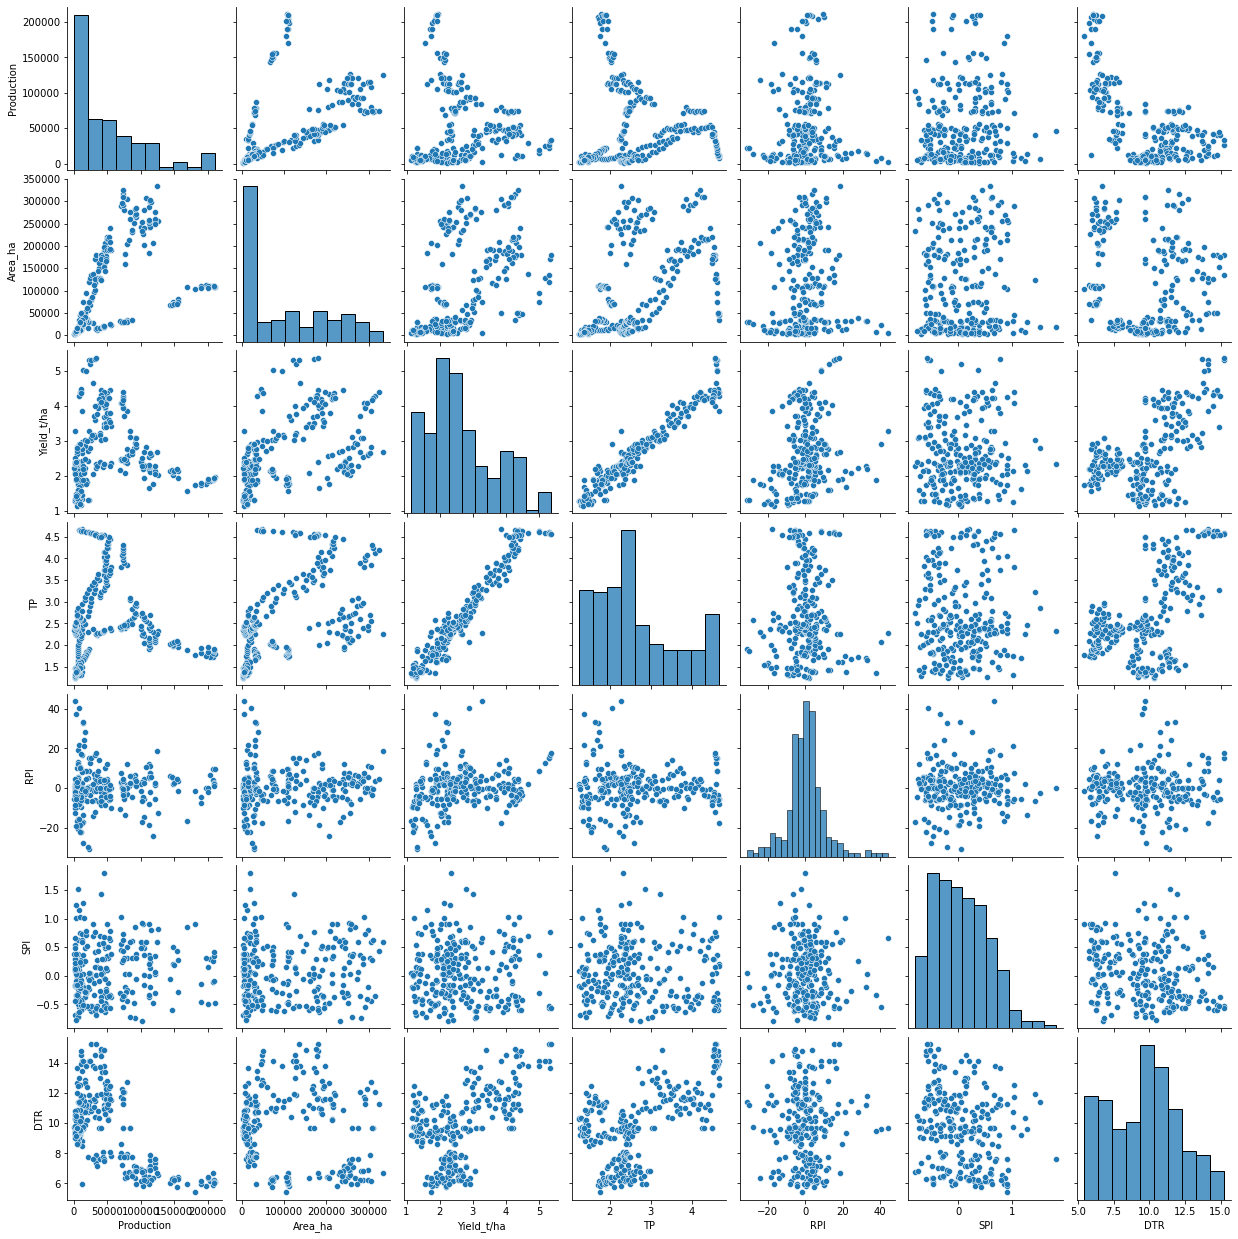

In [14]:
# Visualizing pair plots for checking linear relationships 
sns.pairplot(df,vars=['Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR'])
plt.show()

<AxesSubplot:>

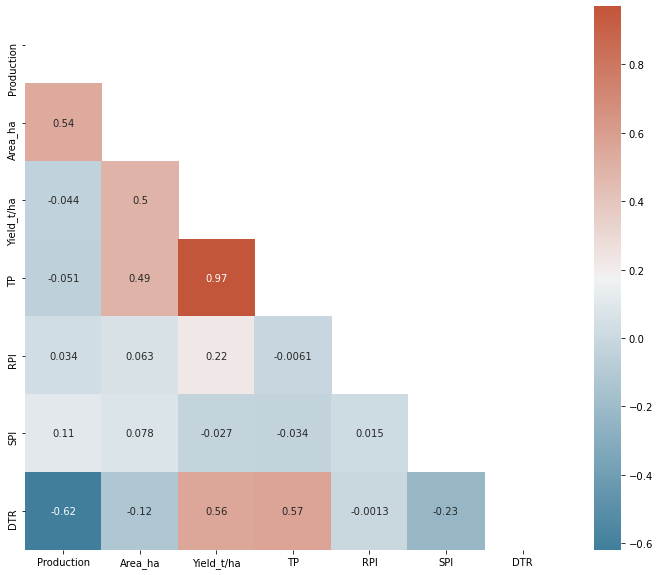

In [15]:
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [16]:
# Displaying correlation matrix
df_cor = df.corr()

display(df_cor)

,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR
Production,1.000000,0.541043,-0.043595,-0.051374,0.034428,0.110372,-0.619174
Area_ha,0.541043,1.000000,0.495048,0.491860,0.063037,0.077784,-0.117969
Yield_t/ha,-0.043595,0.495048,1.000000,0.969513,0.222466,-0.026994,0.555198
TP,-0.051374,0.491860,0.969513,1.000000,-0.006108,-0.033686,0.566824
RPI,0.034428,0.063037,0.222466,-0.006108,1.000000,0.015174,-0.001305
SPI,0.110372,0.077784,-0.026994,-0.033686,0.015174,1.000000,-0.226842
DTR,-0.619174,-0.117969,0.555198,0.566824,-0.001305,-0.226842,1.000000


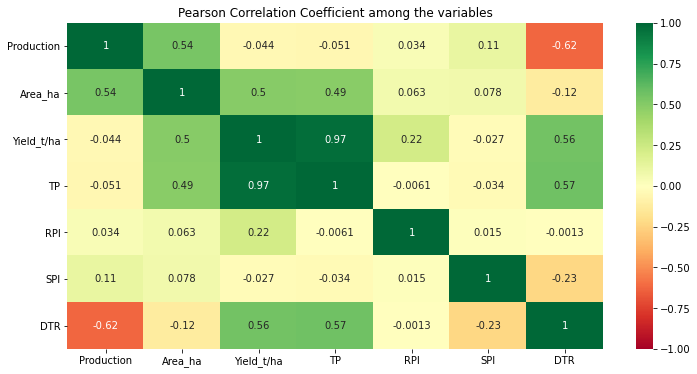

In [17]:
# Showing correlation matrix and heat-map in a different way
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.title("Pearson Correlation Coefficient among the variables")
plt.show()

#### Observations
- Production is posively correlated with Area_ha but negatively correlated with DTR
- Yield_t/ha is positively correlated with Area_ha and DTR

#### Checking multicolinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
var = df[['Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = var.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(var.values, i)
                          for i in range(len(var.columns))]
  
print(vif_data)

      feature          VIF
0  Production     2.551929
1     Area_ha     5.030815
2  Yield_t/ha  1025.699511
3          TP  1013.416638
4         RPI     7.662614
5         SPI     1.039202
6         DTR    15.847359


#### Here we can see that feature Yield_t/ha and TP are correlated because high VIF values, hence we will drop either of them. 

In [19]:
df = df.drop("TP",axis=1)
df.head()

,year,District,crop,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR,Prod_category
0,1995,Bagerhat,aman,207455,110150,1.88,9.72,-0.11,5.88,H
1,1996,Bagerhat,aman,203787,110300,1.85,6.53,0.29,6.15,H
2,1997,Bagerhat,aman,198191,112890,1.76,0.20,0.32,5.80,L
3,1998,Bagerhat,aman,180681,103958,1.74,-1.79,0.90,5.40,M
4,1999,Bagerhat,aman,210729,107723,1.96,9.44,-0.47,6.08,H


In [20]:
# Conversion of data type
df['year'] = df['year'].astype('int') 

# Showing data type again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           264 non-null    int32  
 1   District       264 non-null    object 
 2   crop           264 non-null    object 
 3   Production     264 non-null    int64  
 4   Area_ha        264 non-null    int64  
 5   Yield_t/ha     264 non-null    float64
 6   RPI            264 non-null    float64
 7   SPI            264 non-null    float64
 8   DTR            264 non-null    float64
 9   Prod_category  264 non-null    object 
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 19.7+ KB
None


In [21]:
df.describe()

,year,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2005.500000,51944.219697,105531.545455,2.652424,0.102803,0.060303,9.666364
std,6.356339,53068.368801,99851.000391,1.004927,10.220905,0.493401,2.434725
min,1995.000000,1250.000000,2005.000000,1.130000,-30.950000,-0.790000,5.400000
25%,2000.000000,9432.500000,15483.500000,1.930000,-5.430000,-0.350000,7.622500
50%,2005.500000,35033.500000,69667.500000,2.395000,-0.150000,0.030000,9.700000
75%,2011.000000,79128.000000,189848.500000,3.265000,4.512500,0.380000,11.312500
max,2016.000000,210729.000000,333980.000000,5.370000,43.920000,1.810000,15.250000


In [22]:

df['prod_cat'] = pd.cut(df['Production'], 
                             bins=[0, 35000, 80000, 211000], 
                             labels=["Low", "Moderate","Optimum"])

display(df.sample(10))
display(df['prod_cat'].value_counts())

,year,District,crop,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR,Prod_category,prod_cat
254,2007,Satkhira,aus,16590,40775,2.46,-1.48,-0.28,9.85,H,Low
101,2008,Khulna,boro,55733,190963,3.43,-9.90,-0.37,11.55,M,Moderate
164,2005,Narail,boro,25571,135252,5.29,15.35,-0.53,15.25,M,Low
202,1999,Satkhira,aman,124900,333980,2.67,18.46,0.59,6.70,H,Optimum
36,2009,Bagerhat,boro,46185,169534,3.67,-1.31,-0.03,11.03,M,Moderate
124,2009,Khulna,aus,5927,8673,1.46,4.09,-0.49,9.35,H,Low
258,2011,Satkhira,aus,13525,25240,1.87,-27.70,-0.51,9.75,H,Low
134,1997,Narail,aman,33295,14222,2.34,3.71,-0.68,7.33,L,Low
172,2013,Narail,boro,41505,179017,4.31,-4.58,-0.44,14.45,H,Moderate
133,1996,Narail,aman,33722,15250,2.21,-1.52,0.02,7.90,L,Low


Low         132
Moderate     69
Optimum      63
Name: prod_cat, dtype: int64

In [23]:
df = df.drop("Prod_category",axis=1)
display(df.sample(10))

,year,District,crop,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR,prod_cat
200,1997,Satkhira,aman,121480,248075,2.04,-5.48,-0.30,7.00,Optimum
37,2010,Bagerhat,boro,46830,183461,3.92,2.45,-0.63,11.03,Moderate
26,1999,Bagerhat,boro,21035,56587,2.69,0.45,-0.04,10.75,Low
42,2015,Bagerhat,boro,51160,213625,4.18,-3.89,0.32,10.24,Moderate
80,2009,Khulna,aman,76290,181425,2.38,-3.98,-0.20,6.70,Moderate
190,2009,Narail,aus,6494,8012,1.23,-20.49,-0.35,12.48,Low
133,1996,Narail,aman,33722,15250,2.21,-1.52,0.02,7.90,Low
251,2004,Satkhira,aus,2393,5718,2.39,-1.66,0.12,9.83,Low
132,1995,Narail,aman,35275,10696,2.30,2.89,0.27,7.63,Moderate
24,1997,Bagerhat,boro,14095,30054,2.13,-13.67,1.27,9.63,Low


In [24]:
# Conversion of data type
df['District'] = df['District'].astype('category') 

# Showing data type again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        264 non-null    int32   
 1   District    264 non-null    category
 2   crop        264 non-null    object  
 3   Production  264 non-null    int64   
 4   Area_ha     264 non-null    int64   
 5   Yield_t/ha  264 non-null    float64 
 6   RPI         264 non-null    float64 
 7   SPI         264 non-null    float64 
 8   DTR         264 non-null    float64 
 9   prod_cat    264 non-null    category
dtypes: category(2), float64(4), int32(1), int64(2), object(1)
memory usage: 16.4+ KB
None


In [25]:
df= pd.get_dummies(df, drop_first=True)

In [26]:
df.quantile([0,0.25,0.5,0.75,1])

,year,Production,Area_ha,Yield_t/ha,RPI,SPI,DTR,District_Khulna,District_Narail,District_Satkhira,crop_aus,crop_boro,prod_cat_Moderate,prod_cat_Optimum
0.00,1995.0,1250.0,2005.0,1.130,-30.9500,-0.79,5.4000,0.00,0.00,0.00,0.0,0.0,0.0,0.0
0.25,2000.0,9432.5,15483.5,1.930,-5.4300,-0.35,7.6225,0.00,0.00,0.00,0.0,0.0,0.0,0.0
0.50,2005.5,35033.5,69667.5,2.395,-0.1500,0.03,9.7000,0.00,0.00,0.00,0.0,0.0,0.0,0.0
0.75,2011.0,79128.0,189848.5,3.265,4.5125,0.38,11.3125,0.25,0.25,0.25,1.0,1.0,1.0,0.0
1.00,2016.0,210729.0,333980.0,5.370,43.9200,1.81,15.2500,1.00,1.00,1.00,1.0,1.0,1.0,1.0


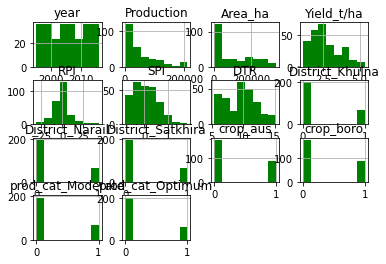

In [27]:
# Displaing histogram for checking data distribution
df.hist(bins=8,color='g')
plt.show()

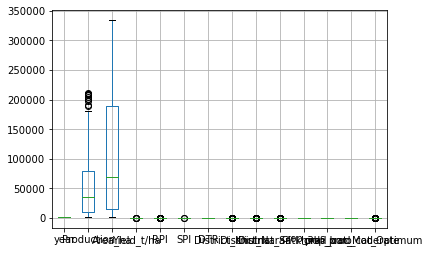

In [28]:
df.boxplot()
plt.show()

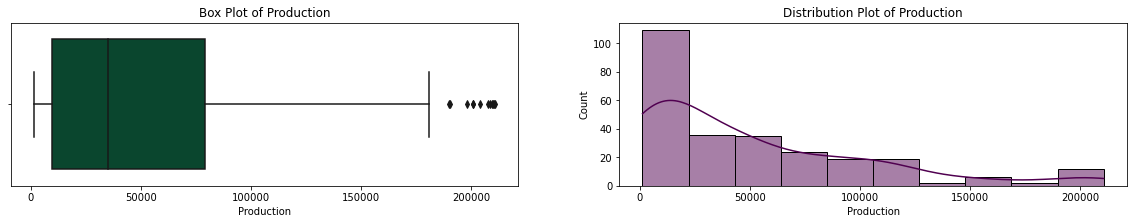

In [29]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['Production'],color='#005030')
plt.title(f'Box Plot of Production')

plt.subplot(1,2,2)
sns.histplot(x=df['Production'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Production')
plt.show()

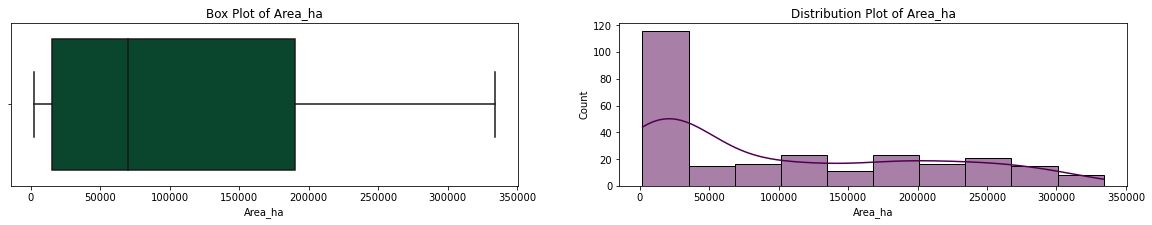

In [30]:
plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.boxplot(x=df['Area_ha'],color='#005030')
plt.title(f'Box Plot of Area_ha')

plt.subplot(1,2,2)
sns.histplot(x=df['Area_ha'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Area_ha')
plt.show()

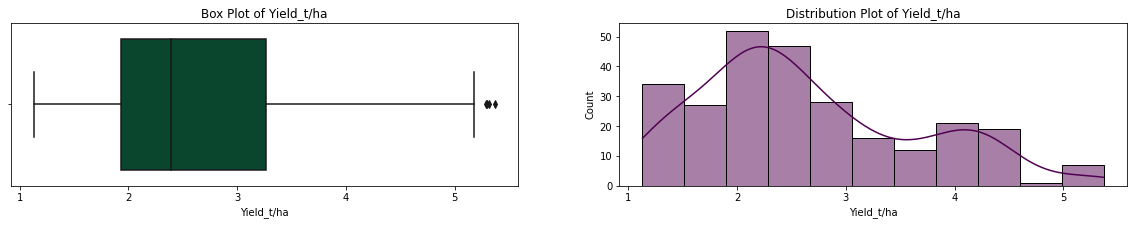

In [31]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['Yield_t/ha'],color='#005030')
plt.title(f'Box Plot of Yield_t/ha')

plt.subplot(1,2,2)
sns.histplot(x=df['Yield_t/ha'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Yield_t/ha')
plt.show()

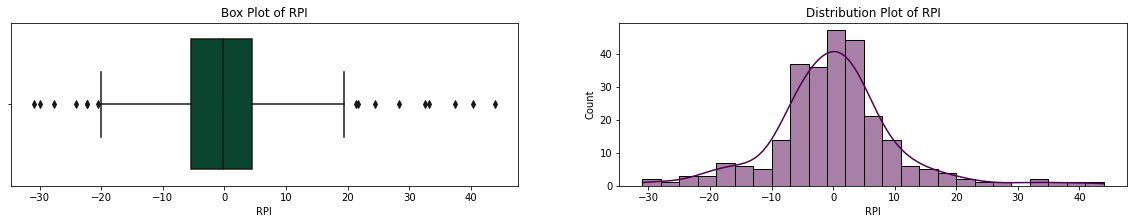

In [32]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['RPI'],color='#005030')
plt.title(f'Box Plot of RPI')

plt.subplot(1,2,2)
sns.histplot(x=df['RPI'], color='#500050', kde=True)
plt.title(f'Distribution Plot of RPI')
plt.show()

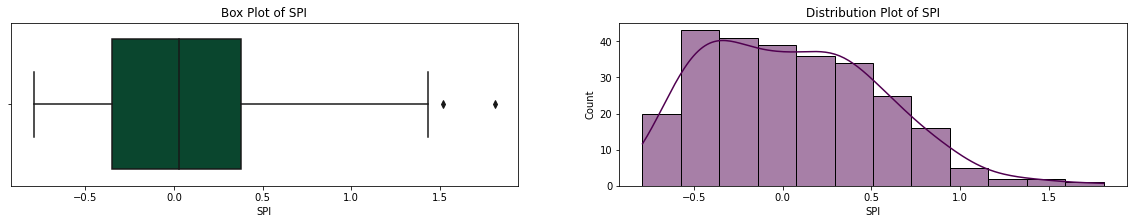

In [33]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['SPI'],color='#005030')
plt.title(f'Box Plot of SPI')

plt.subplot(1,2,2)
sns.histplot(x=df['SPI'], color='#500050', kde=True)
plt.title(f'Distribution Plot of SPI')
plt.show()

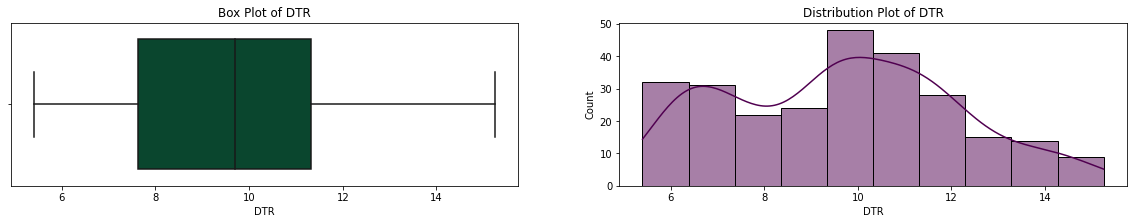

In [34]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['DTR'],color='#005030')
plt.title(f'Box Plot of DTR')

plt.subplot(1,2,2)
sns.histplot(x=df['DTR'], color='#500050', kde=True)
plt.title(f'Distribution Plot of DTR')
plt.show()

#### From the above boxplot and histograms we can see that there are some outliers in the features production, Yield_t/ha, RPI, SPI and most of them are not normally distributed.

In [35]:
display(df.columns)

Index(['year', 'Production', 'Area_ha', 'Yield_t/ha', 'RPI', 'SPI', 'DTR',
       'District_Khulna', 'District_Narail', 'District_Satkhira', 'crop_aus',
       'crop_boro', 'prod_cat_Moderate', 'prod_cat_Optimum'],
      dtype='object')

In [36]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               264 non-null    int32  
 1   Production         264 non-null    int64  
 2   Area_ha            264 non-null    int64  
 3   Yield_t/ha         264 non-null    float64
 4   RPI                264 non-null    float64
 5   SPI                264 non-null    float64
 6   DTR                264 non-null    float64
 7   District_Khulna    264 non-null    uint8  
 8   District_Narail    264 non-null    uint8  
 9   District_Satkhira  264 non-null    uint8  
 10  crop_aus           264 non-null    uint8  
 11  crop_boro          264 non-null    uint8  
 12  prod_cat_Moderate  264 non-null    uint8  
 13  prod_cat_Optimum   264 non-null    uint8  
dtypes: float64(4), int32(1), int64(2), uint8(7)
memory usage: 15.3 KB


(264, 14)

In [37]:
# Standardize the features
x = df.drop(["Production"],axis=1)
y = df[["Production"]]

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(df.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(264, 14) (211, 13) (53, 13) (211, 1) (53, 1)


In [39]:
#Modeling
from sklearn.model_selection import KFold
# seed = 40
#np.random.seed(seed)
#set_random_seed(seed)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rgr = LinearRegression()
rgr = rgr.fit(x_train, y_train)
scores_lr = cross_val_score(rgr, x_train, y_train, cv=kf,scoring='neg_mean_squared_error')
print("MSE with all of the original data: %0.4f (+/- %0.4f)" % (scores_lr.mean(), scores_lr.std() * 2))
scores_lr = cross_val_score(rgr, x_train, y_train, cv=kf,scoring='r2')
print("R^2 of the model: %0.4f (+/- %0.4f)" % (scores_lr.mean(), scores_lr.std() * 2))

MSE with all of the original data: -0.1446 (+/- 0.0518)
R^2 of the model: 0.8469 (+/- 0.0474)


In [41]:
# The coefficients
print("Coefficients: \n", rgr.coef_)

Coefficients: 
 [[-0.01794195 -0.0912926  -0.09575565  0.02605107 -0.02064062 -0.05292681
  -0.16657952 -0.07693161 -0.12020296 -0.18146636  0.06286406  0.32308052
   0.90574412]]


In [42]:
# # coefficients = pd.DataFrame({'coefficients':np.squeeze(model.coef_)})
# coeff = pd.DataFrame({'coefficients':np.squeeze (rgr.coef_)})
# display(coeff)

In [43]:
# address = ['year', 'Area_ha', 'Yield_t/ha', 'RPI', 'SPI', 'DTR',
#        'District_Khulna', 'District_Narail', 'District_Satkhira', 'crop_aus',
#        'crop_boro', 'prod_cat_Moderate', 'prod_cat_Optimum']
 
# coeff['Address'] = address
# display(coeff)

In [44]:
rgr.intercept_

array([0.0053088])

In [45]:
y_pred = pd.DataFrame(rgr.predict(x_test))
display(y_pred.head(10))

,0
0,1.416687
1,-0.781391
2,1.299388
3,-0.941333
4,-0.289355
5,-0.945419
6,-0.893637
7,-0.856383
8,1.835446
9,-0.952488


In [46]:
y_pred = y_pred.rename(columns={0: 'Predicted'})

display(y_pred.head())

,Predicted
0,1.416687
1,-0.781391
2,1.299388
3,-0.941333
4,-0.289355


In [47]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  0.26212478972624464
mean squared error =  0.1336630977157443
root mean squared error =  0.3655996412959732
coefficient of determination =  0.8807603542800023


In [48]:
# prediction on Training data
training_data_prediction = rgr.predict(x_train)

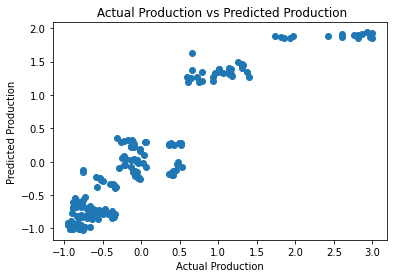

In [49]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title(" Actual Production vs Predicted Production")
plt.show()

# Decision Tree

In [50]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [51]:
dt = DecisionTreeRegressor(max_depth=3, random_state=1234)
dt = dt.fit(x_train, y_train)

R-squared: 0.967643798006726
MSE:  0.0272357320869485
RMSE:  0.01361786604347425


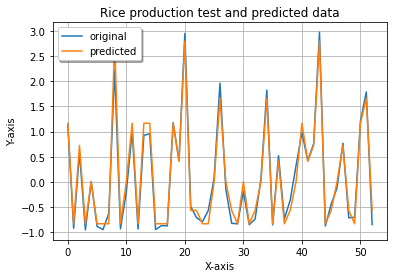

In [52]:
score = dt.score(x_train, y_train)
print("R-squared:", score)

ypred = dt.predict(x_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Rice production test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

In [53]:
# Visualize the tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_12 <= 0.61
|   |--- feature_11 <= 0.54
|   |   |--- feature_9 <= 0.35
|   |   |   |--- value: [-0.57]
|   |   |--- feature_9 >  0.35
|   |   |   |--- value: [-0.83]
|   |--- feature_11 >  0.54
|   |   |--- feature_1 <= 1.55
|   |   |   |--- value: [0.00]
|   |   |--- feature_1 >  1.55
|   |   |   |--- value: [0.41]
|--- feature_12 >  0.61
|   |--- feature_1 <= 0.52
|   |   |--- feature_1 <= -0.13
|   |   |   |--- value: [1.66]
|   |   |--- feature_1 >  -0.13
|   |   |   |--- value: [2.80]
|   |--- feature_1 >  0.52
|   |   |--- feature_0 <= 0.63
|   |   |   |--- value: [1.17]
|   |   |--- feature_0 >  0.63
|   |   |   |--- value: [0.72]



In [54]:
# # Save to file
# with open("decistion_tree_reg.txt", "w") as fout:
#     fout.write(text_representation)

In [55]:
# %pip install dtreeviz

In [56]:
# from dtreeviz.trees import dtreeviz # remember to load the package
# import graphviz


In [57]:
# viz = dtreeviz(dt, x_train, y_train, 
#                title="Boston data set regression",
#                fontname="Arial",
#                title_fontsize=16,
#                colors = {"title":"purple"})

# viz

## Random Forest 

In [58]:
#Using all parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

score = rf.score(x_train, y_train)
print("R-squared:", score)

ypred = rf.predict(x_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

R-squared: 0.996931832236387
MSE:  0.00777271309354643
RMSE:  0.003886356546773215


<ipython-input-58-f8dc3bdf7494>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


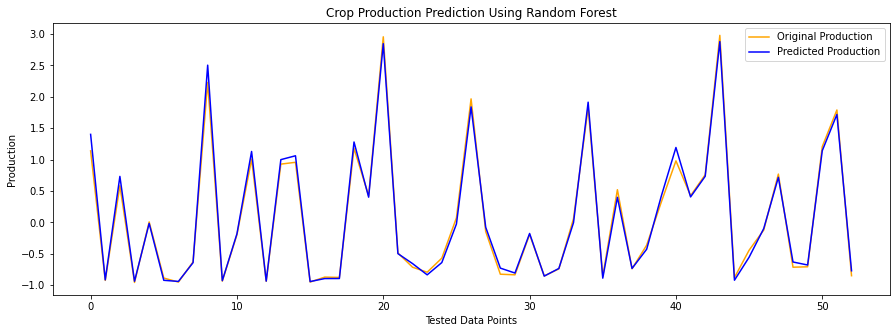

In [59]:
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Original Production')
plt.plot(ypred, color='blue',label='Predicted Production')
plt.title('Crop Production Prediction Using Random Forest')
plt.xlabel("Tested Data Points")
plt.ylabel('Production')
plt.legend()
plt.show()

### Support Vector Machine - Regression (SVR)

In [60]:
# from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.01)
# svr_lin = SVR(gamma='auto',kernel='linear', C=1e3)
# svr_poly = SVR(gamma='auto',kernel='poly', C=1e3, degree=2)

# scores_rbf = cross_val_score(svr_rbf, x_train, y_train, cv=kf,scoring='neg_mean_squared_error')
# print("MSE of svr_rbf: %0.4f (+/- %0.4f)" % (-scores_rbf.mean(), scores_rbf.std() * 2))

# scores_lin = cross_val_score(svr_lin, x_train, y_train, cv=kf,scoring='neg_mean_squared_error')
# print("MSE of svr_lin: %0.4f (+/- %0.4f)" % (-scores_lin.mean(), scores_lin.std() * 2))

# scores_poly = cross_val_score(svr_poly, x_train, y_train, cv=kf,scoring='neg_mean_squared_error')
# print("MSE of svr_poly: %0.4f (+/- %0.4f)" % (-scores_poly.mean(), scores_poly.std() * 2))

In [61]:
#using all parameters
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Default hyperparameters
svr.fit(x_train,y_train)
pred_all=svr.predict(x_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: 0.9813400313233787
RMSE: 0.14462749950177306
MAE: 0.10949675281538863


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


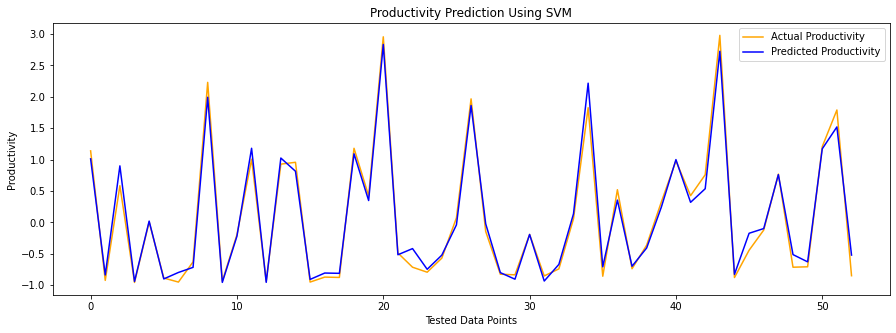

In [62]:
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Actual Productivity')
plt.plot(pred_all, color='blue',label='Predicted Productivity')
plt.title('Productivity Prediction Using SVM')
plt.xlabel("Tested Data Points")
plt.ylabel('Productivity')
plt.legend()
plt.show()

### LASSO REGRESSION

In [63]:
#using all parameters
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_all= model_lasso.predict(x_test)

print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_all))) 
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: 0.8724952742566058
RMSE: 0.37805811375561654
MAE: 0.270983519619027


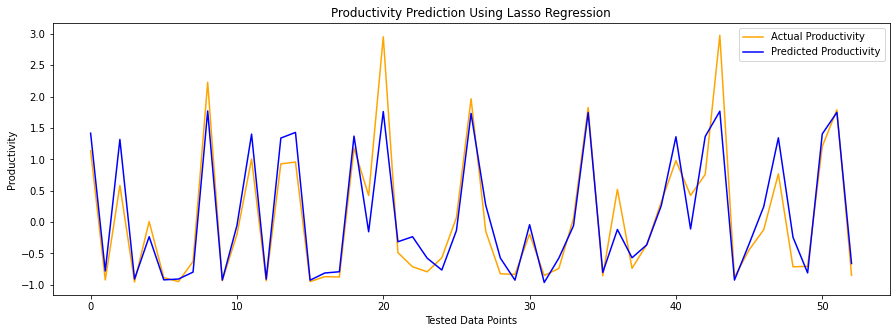

In [64]:
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Actual Productivity')
plt.plot(pred_all, color='blue',label='Predicted Productivity')
plt.title('Productivity Prediction Using Lasso Regression')
plt.xlabel("Tested Data Points")
plt.ylabel('Productivity')
plt.legend()
plt.show()

### Gradient Boosting Regressor

In [65]:
x

array([[-1.65503185,  0.04634131, -0.77009727, ..., -0.70710678,
        -0.59484969,  1.78619041],
       [-1.49740977,  0.04784641, -0.80000689, ..., -0.70710678,
        -0.59484969,  1.78619041],
       [-1.33978769,  0.07383432, -0.88973576, ..., -0.70710678,
        -0.59484969,  1.78619041],
       ...,
       [ 1.33978769, -0.76215375,  0.2567998 , ..., -0.70710678,
        -0.59484969, -0.55985073],
       [ 1.49740977, -0.89901675,  0.04743243, ..., -0.70710678,
        -0.59484969, -0.55985073],
       [ 1.65503185, -0.90640173,  0.12719143, ..., -0.70710678,
        -0.59484969, -0.55985073]])

In [66]:
y

array([[ 2.93595132],
       [ 2.86670166],
       [ 2.7610525 ],
       [ 2.43047408],
       [ 2.9977625 ],
       [ 2.61241493],
       [ 2.95435875],
       [ 2.81259328],
       [ 2.97404997],
       [ 2.22901193],
       [ 2.97758042],
       [ 2.98945556],
       [ 2.60486316],
       [ 2.81136612],
       [ 1.96836283],
       [ 1.82521917],
       [ 1.82046156],
       [ 1.73206817],
       [ 1.78917838],
       [ 1.96602179],
       [ 1.85557726],
       [ 1.93808026],
       [-0.75129127],
       [-0.75157446],
       [-0.71457083],
       [-0.71457083],
       [-0.58354774],
       [-0.53818053],
       [-0.51548748],
       [-0.49396495],
       [-0.48820674],
       [-0.39994551],
       [-0.36662335],
       [-0.36348937],
       [-0.26694008],
       [-0.11745294],
       [-0.10873065],
       [-0.09655344],
       [-0.08607536],
       [-0.12761006],
       [-0.13170689],
       [-0.01895907],
       [-0.0148056 ],
       [ 0.03796234],
       [-0.7294478 ],
       [-0

In [67]:
x1 = pd.DataFrame(x)
x1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.655032,0.046341,-0.770097,0.942721,-0.345817,-1.558104,-0.57735,-0.57735,-0.577350,-0.707107,-0.707107,-0.59485,1.786190
1,-1.497410,0.047846,-0.800007,0.630023,0.466422,-1.446998,-0.57735,-0.57735,-0.577350,-0.707107,-0.707107,-0.59485,1.786190
2,-1.339788,0.073834,-0.889736,0.009528,0.527340,-1.591025,-0.57735,-0.57735,-0.577350,-0.707107,-0.707107,-0.59485,1.786190
3,-1.182166,-0.015789,-0.909676,-0.185541,1.705087,-1.755626,-0.57735,-0.57735,-0.577350,-0.707107,-0.707107,-0.59485,1.786190
4,-1.024544,0.021989,-0.690338,0.915274,-1.076832,-1.475804,-0.57735,-0.57735,-0.577350,-0.707107,-0.707107,-0.59485,1.786190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1.024544,-0.786958,0.216920,0.999575,0.364892,-0.076689,-0.57735,-0.57735,1.732051,1.414214,-0.707107,-0.59485,-0.559851
260,1.182166,-0.759786,0.246830,1.018200,-0.467653,0.190788,-0.57735,-0.57735,1.732051,1.414214,-0.707107,-0.59485,-0.559851
261,1.339788,-0.762154,0.256800,0.960366,-0.386429,-0.047884,-0.57735,-0.57735,1.732051,1.414214,-0.707107,-0.59485,-0.559851
262,1.497410,-0.899017,0.047432,0.104611,-0.812854,0.013842,-0.57735,-0.57735,1.732051,1.414214,-0.707107,-0.59485,-0.559851


In [68]:
y1 = pd.DataFrame(y)
y1

,0
0,2.935951
1,2.866702
2,2.761052
3,2.430474
4,2.997763
...,...
259,-0.802454
260,-0.786596
261,-0.788672
262,-0.869212


In [69]:
from sklearn import ensemble
yield_predict = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [70]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3) #80% for Training and 20% for Testing
print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)

(184, 13) (80, 13) (184, 1) (80, 1)


In [71]:
yield_predict.fit(x1_train, y1_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=5)

In [72]:
yield_predict_test=yield_predict.predict(x1_test)
yield_predict_train=yield_predict.predict(x1_train)
# pd.DataFrame({'actual unseen data':y1_train,'predicted unseen data':yield_predict_train})

In [73]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(yield_predict, x1_test, y1_test, cv=5)
scores

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

array([0.95194386, 0.85843981, 0.80767011, 0.79474358, 0.98612276])

In [74]:
predictions = cross_val_predict(yield_predict, x1_test, y1_test, cv=5)
accuracy = metrics.r2_score(y1_test, predictions)
accuracy

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

0.887934463282475

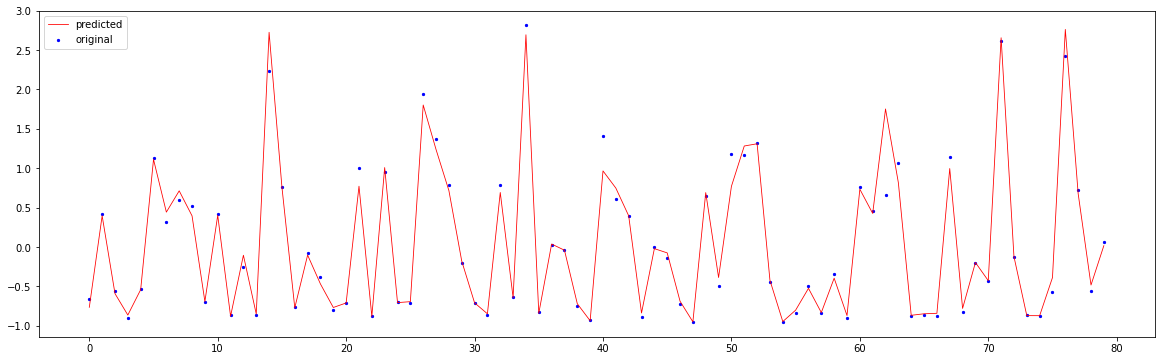

In [75]:
x_ax = range(len(y1_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y1_test, s=5, color="blue", label="original")
plt.plot(x_ax, yield_predict_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [76]:
print('MAE= ',metrics.mean_absolute_error(y1_test,yield_predict_test))
print('MSE= ',metrics.mean_squared_error(y1_test,yield_predict_test))
print('R2 value= ',yield_predict.score(x1_test,y1_test))
print('Adjusted R2 value= ',1 - (1 - (yield_predict.score(x1_test,y1_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y1_train,yield_predict_train)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y1_test,yield_predict_test)))

MAE=  0.080354635990774
MSE=  0.028899974182221778
R2 value=  0.9677759486589778
Adjusted R2 value=  0.9673434110570849
RMSE (train)=  0.00316331026086512
RMSE (test)=  0.1699999240653412


### MLP

In [77]:
#MLP Training
from sklearn.neural_network import MLPRegressor
#mlp = MLPRegressor()
mlp = MLPRegressor(hidden_layer_sizes=(35,15))
mlp.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(35, 15))

In [78]:
#Prediction
y_pred_MLP = mlp.predict(x_test)
print('MSE-MLP: %.2f'
      % mean_squared_error(y_test, y_pred_MLP))

MSE-MLP: 0.04


In [79]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_pred_MLP))
print('MSE= ',metrics.mean_squared_error(y_test,y_pred_MLP))
print('R2 value= ',yield_predict.score(x_test,y_test))
print('Adjusted R2 value= ',1 - (1 - (yield_predict.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_pred_MLP)))

MAE=  0.13712150925523897
MSE=  0.04195167837647524
R2 value=  0.9943466062345848
Adjusted R2 value=  0.9942707217545121
RMSE (test)=  0.20482108870054186


In [80]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split
# x, y = make_regression(n_samples=200, random_state=1)
# x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)
# regrr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
# regrr.predict(x_test[:2])
# regrr.score(x_test, y_test)

## Results and Discussions

•	Presentation and visualization of the results<br>
•	Discussion and interpretation of the results

### Conclusion

•	Summary of main findings and limitations <br>
•	Recommendations for future work


### References

Filippi, P., Jones, E.J., Wimalathunge, N.S., Somarathna, P.D.S.N., Pozza, L.E., Ugbaje, S.U., Bishop, T.F.A., 2019a. An approach to forecast grain crop yield using multilayered, multi-farm data sets and machine learning. Precis. Agric. 1–15. https://doi.org/10.1007/s11119-018-09628-4.<br>

Klompenburg, T. V., Kassahun, A., Catal, C., 2020. Crop yield prediction using machine learning: A systematic literature review. 
    Computers and Electronics in Agriculture. 177. https://doi.org/10.1016/j.compag.2020.105709.<br>

McQueen, R.J., Garner, S.R., Nevill-Manning, C.G., Witten, I.H., 1995. Applying machine learning to agricultural data. Comput. 
    Electron. Agric. 12 (4), 275–293. https://doi.org/10.1016/0168-1699(95)98601-9. <br>

Xu, X., Gao, P., Zhu, X., Guo, W., Ding, J., Li, C., Wu, X., 2019. Design of an integrated climatic assessment indicator (ICAI) 
    for wheat production: a case study in Jiangsu Province, China. Ecol. Ind. 101, 943–953. 
    https://doi.org/10.1016/j.ecolind.2019.01.059 
